# Linear Regression with Statsmodels for Movie Revenue

- xx/xx/xx

## Activity: Create a Linear Regression Model with Statsmodels for Revenue

- Today we will be working with JUST the data data from the TMDB API for years 2000-2021. 
    - We will prepare the data for modeling
        - Some feature engineering
        - Our usual Preprocessing
        - New steps for statsmodels!
    - We will fit a statsmodels linear regression.
    - We Will inspect the model summary.
    - We will create the visualizations to check assumptions about the residuals.



- Next class we will continue this activity.
    - We will better check all 4 assumptions.
    - We will discuss tactics for dealing with violations of the assumptions. 
    - We will use our coefficients to make stakeholder recommendations.

### Concepts Demonstrated

- [ ] Using `glob` for loading in all final files. 
- [ ] Statsmodels OLS
- [ ] QQ-Plot
- [ ] Residual Plot

# Loading the Data

In [1]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector, ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
## fixing random for lesson generation
np.random.seed(321)

In [2]:
pd.set_option('display.max_columns',100)

### 📚 Finding & Loading Batches of Files with `glob`

In [3]:
## Checking what data we already have in our Data folder using os.listdir
import os
FOLDER = 'Data/'
file_list = sorted(os.listdir(FOLDER))
file_list

['.DS_Store',
 '2010-2021',
 'combined_tmdb_data.csv.gz',
 'final_tmdb_data_2000.csv.gz',
 'final_tmdb_data_2001.csv.gz',
 'final_tmdb_data_2002.csv.gz',
 'final_tmdb_data_2003.csv.gz',
 'final_tmdb_data_2004.csv.gz',
 'final_tmdb_data_2005.csv.gz',
 'final_tmdb_data_2006.csv.gz',
 'final_tmdb_data_2007.csv.gz',
 'final_tmdb_data_2008.csv.gz',
 'final_tmdb_data_2009.csv.gz',
 'title_akas_cleaned.csv.gz',
 'title_basics_cleaned.csv.gz',
 'title_ratings_cleaned.csv.gz',
 'tmdb_api_results_2000.json',
 'tmdb_api_results_2001.json',
 'tmdb_api_results_2002.json',
 'tmdb_api_results_2003.json',
 'tmdb_api_results_2004.json',
 'tmdb_api_results_2005.json',
 'tmdb_api_results_2006.json',
 'tmdb_api_results_2007.json',
 'tmdb_api_results_2008.json',
 'tmdb_api_results_2009.json',
 'tmdb_api_results_2010.json',
 'tmdb_api_results_2011.json',
 'tmdb_api_results_2012.json',
 'tmdb_api_results_2013.json',
 'tmdb_api_results_2014.json',
 'tmdb_api_results_2015.json',
 'tmdb_api_results_2016.json',


> Why isn't it working?

In [6]:
## let's check the filepath 

## add the folder plus filename
FOLDER+ file_list[1]

'Data/2010-2021'

In [ ]:
## add the folder plus filename


In [7]:
## try read csv with folder plus filename
## try read csv with folder plus filename
pd.read_csv(FOLDER+ file_list[5])

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0096056,0.0,/95U3MUDXu4xSCmVLtWgargRipDi.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,109809.0,en,Crime and Punishment,A modern day adaptation of Dostoyevsky's class...,6.751,/2ckMQwDi11TofiNoaE3sHrYbaCh.jpg,[],"[{'iso_3166_1': 'US', 'name': 'United States o...",2002-06-01,0.0,126.0,"[{'english_name': 'Polish', 'iso_639_1': 'pl',...",Released,NaN,Crime and Punishment,0.0,5.5,11.0,NaN
2,tt0118926,0.0,/p3BzCgX1gDIPdWfuFqRHIe52Ynf.jpg,NaN,0.0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",NaN,20689.0,en,The Dancer Upstairs,A police detective in a South American country...,8.968,/jG662jKzEf63fhcbbN3WiLlz5MX.jpg,"[{'id': 357, 'logo_path': None, 'name': 'Vía D...","[{'iso_3166_1': 'ES', 'name': 'Spain'}, {'iso_...",2002-09-20,5227348.0,132.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"An honest man caught in a world of intrigue, p...",The Dancer Upstairs,0.0,6.3,50.0,R
3,tt0119980,0.0,NaN,NaN,0.0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",NaN,563364.0,en,Random Shooting in LA,The seamy side of Los Angeles is revealed thro...,1.400,NaN,"[{'id': 111499, 'logo_path': None, 'name': 'Co...","[{'iso_3166_1': 'US', 'name': 'United States o...",2002-07-13,0.0,91.0,[],Released,NaN,Random Shooting in LA,0.0,0.0,0.0,NaN
4,tt0120679,0.0,/s04Ds4xbJU7DzeGVyamccH4LoxF.jpg,NaN,12000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",https://www.miramax.com/movie/frida,1360.0,en,Frida,"A biography of artist Frida Kahlo, who channel...",20.554,/a4hgR6aKoohB6MHni171jbi9BkU.jpg,"[{'id': 14, 'logo_path': '/m6AHu84oZQxvq7n1rsv...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",2002-08-29,56298474.0,123.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Prepare to be seduced.,Frida,0.0,7.5,1720.0,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1216,tt6449044,0.0,/a9pkw8stijESGx1flSGPqcXLkHu.jpg,"{'id': 957260, 'name': 'The Conman Collection'...",0.0,"[{'id': 35, 'name': 'Comedy'}]",NaN,314105.0,cn,賭俠2002,Ka-shing has lived his entire life as a luckle...,2.255,/2hOLi6bgnM2S4MRAznNg9rvlyRH.jpg,"[{'id': 97722, 'logo_path': None, 'name': 'The...","[{'iso_3166_1': 'HK', 'name': 'Hong Kong'}]",2002-11-07,0.0,97.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,NaN,The Conman 2002,0.0,6.0,2.0,NaN
1217,tt6694126,0.0,/sXjVpTZyDvwzPVZve3AmyCUBeHk.jpg,NaN,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,819174.0,fa,عروس خوش‌قدم,Donya is a wealthy woman but she is not living...,0.600,/5hh7PZ1wcjzmBycwFCEaM7gf2M3.jpg,[],[],2002-05-01,0.0,101.0,"[{'english_name': 'Persian', 'iso_639_1': 'fa'...",Released,NaN,The Lucky Bride,0.0,0.0,0.0,NaN
1218,tt8302928,0.0,NaN,NaN,0.0,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...",NaN,866533.0,el,Movie Toons: Treasure Island,NaN,0.600,/efRAGh5Bxs7jnQOgPlh3MCiyqli.jpg,"[{'id': 20477, 'logo_path': '/u0zjebYOFWdLcpR4...","[{'iso_3166_1': 'US', 'name': 'United States o...",2002-09-22,0.0,0.0,[],Released,NaN,Movie Toons: Treasure Island,0.0,0.0,0.0,NaN
1219,tt8474326,0.0,NaN,NaN,0.0,[],NaN,292027.0,en,Skin Eating Jungle Vampires,In the mysterious jungles of Costa Rica a youn...,0.600,/eEVg28143gxcaRssbbIq2lvYVec.jpg,[],[],2002-10-06,0.0,0.0,[],Released,NaN,Skin Eating Jungle Vampires,0.0,0.0,0.0,NaN


- Now we would do that in a loop, and only want to open .csv.gz.
- But there is a better way!
>- Introducing `glob`
    - Glob takes a filepath/query and will find every filename that matches the pattern provided.
    - We use asterisks as wildcards in our query.
    


In [10]:
import glob
## Make a filepath query
q = FOLDER+"final*.csv.gz"
q

# Use glob.glob to get COMPLETE filepaths
file_list = glob.glob(q)
file_list

['Data/final_tmdb_data_2008.csv.gz',
 'Data/final_tmdb_data_2000.csv.gz',
 'Data/final_tmdb_data_2006.csv.gz',
 'Data/final_tmdb_data_2009.csv.gz',
 'Data/final_tmdb_data_2002.csv.gz',
 'Data/final_tmdb_data_2001.csv.gz',
 'Data/final_tmdb_data_2005.csv.gz',
 'Data/final_tmdb_data_2003.csv.gz',
 'Data/final_tmdb_data_2004.csv.gz',
 'Data/final_tmdb_data_2007.csv.gz']

In [11]:
# Use glob.glob to get COMPLETE filepaths
pd.read_csv(file_list[0],lineterminator ='\n') # lineterminater ='\n'

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0119970,0.0,NaN,NaN,0.0,[],NaN,165200.0,en,My Apocalypse,"In an apocalyptic future, a serial killer hold...",0.600,NaN,[],[],NaN,0.0,NaN,[],Released,NaN,My Apocalypse,0.0,4.8,2.0,NaN
2,tt0177636,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",NaN,8890.0,de,Geliebte Clara,A look at the lives of 19th-century composers ...,1.557,/8h4srQUi9bY6nEW3QGtrhi6OZIy.jpg,"[{'id': 45988, 'logo_path': None, 'name': 'Hel...","[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",2008-11-07,0.0,107.0,"[{'english_name': 'German', 'iso_639_1': 'de',...",Released,NaN,Clara,0.0,4.4,5.0,NaN
3,tt0200465,0.0,/ynnarxTMs8jWKV9GK0SpUhGNCgH.jpg,NaN,20000000.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 80, 'n...",http://thebankjobmovie.com/,8848.0,en,The Bank Job,Terry is a small-time car dealer trying to lea...,19.621,/ayrGDJDsSBczjztGUWKqmzL97xg.jpg,"[{'id': 2729, 'logo_path': None, 'name': 'Omni...","[{'iso_3166_1': 'AU', 'name': 'Australia'}, {'...",2008-02-28,64828421.0,112.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The true story of a heist gone wrong... in all...,The Bank Job,0.0,6.8,1757.0,R
4,tt0211946,0.0,/8ZoW4hwuTWxKWDezkoUGBVvyxj5.jpg,NaN,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",http://www.berlin-calling.de/,30508.0,de,Berlin Calling,A man tours clubs around the globe with his ma...,8.973,/biR1lfcq0FeSfv9vLWR7PRHnuV2.jpg,"[{'id': 2387, 'logo_path': None, 'name': 'sabo...","[{'iso_3166_1': 'DE', 'name': 'Germany'}]",2008-10-01,0.0,105.0,"[{'english_name': 'German', 'iso_639_1': 'de',...",Released,NaN,Berlin Calling,0.0,6.8,277.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2070,tt6857302,0.0,NaN,NaN,0.0,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",NaN,77751.0,en,Бабка Ежка и другие,A little girl got lost in a dense forest by ac...,0.600,NaN,[],"[{'iso_3166_1': 'RU', 'name': 'Russia'}]",2006-02-21,0.0,74.0,"[{'english_name': 'Russian', 'iso_639_1': 'ru'...",Released,NaN,Babka Ezhka and Others,0.0,0.0,0.0,NaN
2071,tt7257986,0.0,NaN,NaN,0.0,"[{'id': 12, 'name': 'Adventure'}]",NaN,764494.0,en,Battle of the Monster Trucks,"First of the 3 original, world famous Monster ...",0.622,/kK3OOaQbaU9O4C3jVjMVdBGFfsH.jpg,[],[],2008-01-01,0.0,46.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Battle of the Monster Trucks,0.0,2.0,1.0,PG
2072,tt7534620,0.0,NaN,NaN,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 9648, 'n...",NaN,955758.0,en,"Dick Dickman, P.I.",A vanity project by Wexford-based comedian Bar...,0.600,NaN,[],"[{'iso_3166_1': 'IE', 'name': 'Ireland'}]",2008-12-12,0.0,105.0,[],Released,NaN,"Dick Dickman, P.I.",0.0,0.0,0.0,NaN
2073,tt8598776,0.0,NaN,NaN,0.0,"[{'id': 27, 'name': 'Horror'}]",NaN,535476.0,en,The Artifact,A group of friends come together for their ann...,0.600,/gRSoUtkErmZt0ZjGZPrWcFF6Xds.jpg,"[{'id': 133614, 'logo_path': None, 'name': 'Wo...","[{'iso_3166_1': 'US', 'name': 'United States o...",2008-10-31,0.0,59.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,The Artifact,0.0,0.0,0.0,NaN


> But where are the rest of the years?

In [ ]:
## in a sub-folder


- Recursive Searching with glob.
    - add a `**/` in the middle of your query to grab any matches from all subfolders. 

In [12]:
# Use glob.glob to get COMPLETE filepaths

# Use glob.glob to get COMPLETE filepaths
q = FOLDER+"**/final*.csv.gz"
file_list = glob.glob(q,recursive = True)
file_list

['Data/final_tmdb_data_2008.csv.gz',
 'Data/final_tmdb_data_2000.csv.gz',
 'Data/final_tmdb_data_2006.csv.gz',
 'Data/final_tmdb_data_2009.csv.gz',
 'Data/final_tmdb_data_2002.csv.gz',
 'Data/final_tmdb_data_2001.csv.gz',
 'Data/final_tmdb_data_2005.csv.gz',
 'Data/final_tmdb_data_2003.csv.gz',
 'Data/final_tmdb_data_2004.csv.gz',
 'Data/final_tmdb_data_2007.csv.gz',
 'Data/2010-2021/final_tmdb_data_2021.csv.gz',
 'Data/2010-2021/final_tmdb_data_2017.csv.gz',
 'Data/2010-2021/final_tmdb_data_2012.csv.gz',
 'Data/2010-2021/final_tmdb_data_2013.csv.gz',
 'Data/2010-2021/final_tmdb_data_2016.csv.gz',
 'Data/2010-2021/final_tmdb_data_2020.csv.gz',
 'Data/2010-2021/final_tmdb_data_2010.csv.gz',
 'Data/2010-2021/final_tmdb_data_2018.csv.gz',
 'Data/2010-2021/final_tmdb_data_2015.csv.gz',
 'Data/2010-2021/final_tmdb_data_2014.csv.gz',
 'Data/2010-2021/final_tmdb_data_2011.csv.gz',
 'Data/2010-2021/final_tmdb_data_2019.csv.gz']

In [13]:
# ## use a list comprehension to load in all files into 1 dataframe

# ## use a list comprehension to load in all files into 1 dataframe
df = pd.concat([pd.read_csv(file,lineterminator='\n') for file in file_list])
df


,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0119970,0.0,NaN,NaN,0.0,[],NaN,165200.0,en,My Apocalypse,"In an apocalyptic future, a serial killer hold...",0.600,NaN,[],[],NaN,0.0,NaN,[],Released,NaN,My Apocalypse,0.0,4.8,2.0,NaN
2,tt0177636,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",NaN,8890.0,de,Geliebte Clara,A look at the lives of 19th-century composers ...,1.557,/8h4srQUi9bY6nEW3QGtrhi6OZIy.jpg,"[{'id': 45988, 'logo_path': None, 'name': 'Hel...","[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",2008-11-07,0.0,107.0,"[{'english_name': 'German', 'iso_639_1': 'de',...",Released,NaN,Clara,0.0,4.4,5.0,NaN
3,tt0200465,0.0,/ynnarxTMs8jWKV9GK0SpUhGNCgH.jpg,NaN,20000000.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 80, 'n...",http://thebankjobmovie.com/,8848.0,en,The Bank Job,Terry is a small-time car dealer trying to lea...,19.621,/ayrGDJDsSBczjztGUWKqmzL97xg.jpg,"[{'id': 2729, 'logo_path': None, 'name': 'Omni...","[{'iso_3166_1': 'AU', 'name': 'Australia'}, {'...",2008-02-28,64828421.0,112.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The true story of a heist gone wrong... in all...,The Bank Job,0.0,6.8,1757.0,R
4,tt0211946,0.0,/8ZoW4hwuTWxKWDezkoUGBVvyxj5.jpg,NaN,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",http://www.berlin-calling.de/,30508.0,de,Berlin Calling,A man tours clubs around the globe with his ma...,8.973,/biR1lfcq0FeSfv9vLWR7PRHnuV2.jpg,"[{'id': 2387, 'logo_path': None, 'name': 'sabo...","[{'iso_3166_1': 'DE', 'name': 'Germany'}]",2008-10-01,0.0,105.0,"[{'english_name': 'German', 'iso_639_1': 'de',...",Released,NaN,Berlin Calling,0.0,6.8,277.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4672,tt9906644,0.0,/htoReVItKtolso5VJqFqJDBaOwm.jpg,NaN,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,635903.0,ml,മനോഹരം,Manoharan is a poster artist struggling to fin...,1.309,/cNWfJlveyMEbiORrKmFKZZRDx75.jpg,"[{'id': 125107, 'logo_path': None, 'name': 'Ch...","[{'iso_3166_1': 'IN', 'name': 'India'}]",2019-09-27,0.0,122.0,"[{'english_name': 'Malayalam', 'iso_639_1': 'm...",Released,Beautiful,Manoharam,0.0,6.2,10.0,NaN
4673,tt9913660,0.0,/z6YpkQiWLnRKl5yQD9dSiPDFWN.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,711261.0,en,No Apology,When a group of women struggle to deal with th...,0.646,/fqIWD97MAjgrj8mB2M78kxeSSnk.jpg,[],[],2019-10-23,0.0,102.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,No Apology,0.0,8.0,1.0,NaN
4674,tt9913936,0.0,/i4moNlJn4EpSE5auFeoeIae366g.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",NaN,594570.0,sv,Paradise,Diego hoped to never loose his friends after h...,0.756,/fJFCcueSi7u7OgVQhiDtKsXc8cS.jpg,"[{'id': 69920, 'logo_path': None, 'name': 'DEP...","[{'iso_3166_1': 'SE', 'name': 'Sweden'}]",2019-10-25,0.0,135.0,"[{'english_name': 'Spanish', 'iso_639_1': 'es'...",Released,NaN,Paradise,0.0,8.5,2.0,NaN
4675,tt9914942,0.0,/tjHUeULyw2vtS1DXFp0OHfhUzRX.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,598553.0,ca,La vida sense la Sara Amat,"Pep, a 13-year-old boy, is in love with a girl...",2.901,/ulCLv5kRiC8JnxdRBczDzx0NjSr.jpg,"[{'id': 20786, 'logo_path': None, 'name': ""Mas...","[{'iso_3166_1': 'ES', 'name': 'Spain'}]",2019-07-12,0.0,74.0,"[{'english_name': 'Catalan', 'iso_639_1': 'ca'...",Released,NaN,Life without Sara Amat,0.0,7.8,6.0,NaN


- Dealing with ParserErrors with "possibly malformed files"

    - for a reason I do not fully understand yet, some of the files I downloaded error if I try to read them.
        - "ParserError: Error tokenizing data. C error: Buffer overflow caught - possible malformed input file.`
    - After some googling, the fix was to add `lineterminator='\n'` to pd.read_csv


In [14]:
# remove ids that are 0  and then reset index
df = df.loc[df['imdb_id']!='0'].reset_index(drop=True)
df

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,tt0119970,0.0,NaN,NaN,0.0,[],NaN,165200.0,en,My Apocalypse,"In an apocalyptic future, a serial killer hold...",0.600,NaN,[],[],NaN,0.0,NaN,[],Released,NaN,My Apocalypse,0.0,4.8,2.0,NaN
1,tt0177636,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",NaN,8890.0,de,Geliebte Clara,A look at the lives of 19th-century composers ...,1.557,/8h4srQUi9bY6nEW3QGtrhi6OZIy.jpg,"[{'id': 45988, 'logo_path': None, 'name': 'Hel...","[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",2008-11-07,0.0,107.0,"[{'english_name': 'German', 'iso_639_1': 'de',...",Released,NaN,Clara,0.0,4.4,5.0,NaN
2,tt0200465,0.0,/ynnarxTMs8jWKV9GK0SpUhGNCgH.jpg,NaN,20000000.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 80, 'n...",http://thebankjobmovie.com/,8848.0,en,The Bank Job,Terry is a small-time car dealer trying to lea...,19.621,/ayrGDJDsSBczjztGUWKqmzL97xg.jpg,"[{'id': 2729, 'logo_path': None, 'name': 'Omni...","[{'iso_3166_1': 'AU', 'name': 'Australia'}, {'...",2008-02-28,64828421.0,112.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The true story of a heist gone wrong... in all...,The Bank Job,0.0,6.8,1757.0,R
3,tt0211946,0.0,/8ZoW4hwuTWxKWDezkoUGBVvyxj5.jpg,NaN,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",http://www.berlin-calling.de/,30508.0,de,Berlin Calling,A man tours clubs around the globe with his ma...,8.973,/biR1lfcq0FeSfv9vLWR7PRHnuV2.jpg,"[{'id': 2387, 'logo_path': None, 'name': 'sabo...","[{'iso_3166_1': 'DE', 'name': 'Germany'}]",2008-10-01,0.0,105.0,"[{'english_name': 'German', 'iso_639_1': 'de',...",Released,NaN,Berlin Calling,0.0,6.8,277.0,NaN
4,tt0313088,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,814156.0,en,Jackson,Donald (Barry Primus) promises Sam (Charlie Ro...,0.600,/vdK7UWBz9R2xlKbf8DAGe1UU8FU.jpg,"[{'id': 152123, 'logo_path': None, 'name': 'Be...","[{'iso_3166_1': 'US', 'name': 'United States o...",2008-09-13,0.0,97.0,[],Released,This is going to be the best day of your life.,Jackson,0.0,2.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60125,tt9906644,0.0,/htoReVItKtolso5VJqFqJDBaOwm.jpg,NaN,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,635903.0,ml,മനോഹരം,Manoharan is a poster artist struggling to fin...,1.309,/cNWfJlveyMEbiORrKmFKZZRDx75.jpg,"[{'id': 125107, 'logo_path': None, 'name': 'Ch...","[{'iso_3166_1': 'IN', 'name': 'India'}]",2019-09-27,0.0,122.0,"[{'english_name': 'Malayalam', 'iso_639_1': 'm...",Released,Beautiful,Manoharam,0.0,6.2,10.0,NaN
60126,tt9913660,0.0,/z6YpkQiWLnRKl5yQD9dSiPDFWN.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,711261.0,en,No Apology,When a group of women struggle to deal with th...,0.646,/fqIWD97MAjgrj8mB2M78kxeSSnk.jpg,[],[],2019-10-23,0.0,102.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,No Apology,0.0,8.0,1.0,NaN
60127,tt9913936,0.0,/i4moNlJn4EpSE5auFeoeIae366g.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",NaN,594570.0,sv,Paradise,Diego hoped to never loose his friends after h...,0.756,/fJFCcueSi7u7OgVQhiDtKsXc8cS.jpg,"[{'id': 69920, 'logo_path': None, 'name': 'DEP...","[{'iso_3166_1': 'SE', 'name': 'Sweden'}]",2019-10-25,0.0,135.0,"[{'english_name': 'Spanish', 'iso_639_1': 'es'...",Released,NaN,Paradise,0.0,8.5,2.0,NaN
60128,tt9914942,0.0,/tjHUeULyw2vtS1DXFp0OHfhUzRX.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,598553.0,ca,La vida sense la Sara Amat,"Pep, a 13-year-old boy, is in love with a girl...",2.901,/ulCLv5kRiC8JnxdRBczDzx0NjSr.jpg,"[{'id': 20786, 'logo_path': None, 'name': ""Mas...","[{'iso_3166_1': 'ES', 'name': 'Spain'}]",2019-07-12,0.0,74.0,"[{'english_name': 'Catalan', 'iso_639_1': 'ca'...",Released,

In [15]:
## saving the combined csv to disk
df.to_csv('Data/combined_tmdb_data.csv.gz',compression= "gzip",index = False)

# Preprocessing

In [16]:
## Columns to exclude
drop_cols = ['backdrop_path','backdrop_path','original_title','overview',
                 'poster_path','status','tagline','id','homepage',
                 'production_countries','video','production_companies','spoken_languages',
            'original_language']

## drop columns
df = df.drop(columns=drop_cols)
df

,imdb_id,adult,belongs_to_collection,budget,genres,popularity,release_date,revenue,runtime,title,vote_average,vote_count,certification
0,tt0119970,0.0,NaN,0.0,[],0.600,NaN,0.0,NaN,My Apocalypse,4.8,2.0,NaN
1,tt0177636,0.0,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",1.557,2008-11-07,0.0,107.0,Clara,4.4,5.0,NaN
2,tt0200465,0.0,NaN,20000000.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 80, 'n...",19.621,2008-02-28,64828421.0,112.0,The Bank Job,6.8,1757.0,R
3,tt0211946,0.0,NaN,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",8.973,2008-10-01,0.0,105.0,Berlin Calling,6.8,277.0,NaN
4,tt0313088,0.0,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",0.600,2008-09-13,0.0,97.0,Jackson,2.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60125,tt9906644,0.0,NaN,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",1.309,2019-09-27,0.0,122.0,Manoharam,6.2,10.0,NaN
60126,tt9913660,0.0,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",0.646,2019-10-23,0.0,102.0,No Apology,8.0,1.0,NaN
60127,tt9913936,0.0,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",0.756,2019-10-25,0.0,135.0,Paradise,8.5,2.0,NaN
60128,tt9914942,0.0,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",2.901,2019-07-12,0.0,74.0,Life without Sara Amat,7.8,6.0,NaN


## Feature Engineering


- belongs to collection: convert to boolean
- Genres: get just name and manually OHE
- Cleaning Categories in Certification
- Converting release date to year, month, and day.

### belongs to collection

In [17]:
# there are 3,700+ movies that belong to collections
df['belongs_to_collection'].value_counts()

{'id': 39199, 'name': 'Detective Conan Collection', 'poster_path': '/1wBfr532NOQK68wlo5ApjCmiQIB.jpg', 'backdrop_path': '/9bogrpii4e61SR6a9qLHow7I46U.jpg'}       18
{'id': 148065, 'name': 'Doraemon Collection', 'poster_path': '/4TLSP1KD1uAlp2q1rTrc6SFlktX.jpg', 'backdrop_path': '/rc6OFcSasL5YxBRPUQVwxmVF6h5.jpg'}             16
{'id': 403643, 'name': 'Troublesome Night Collection', 'poster_path': '/bPTx3TP4UJTHQfcLx4qIub9LXmi.jpg', 'backdrop_path': '/n3a7zF5GuxM2X8oPF6pKXqYS6ER.jpg'}    15
{'id': 23456, 'name': 'One Piece Collection', 'poster_path': '/nvAPotUDNcKStSOv2ojGZBNOX8A.jpg', 'backdrop_path': '/3RqSKjokWlXyTBUt3tcR9CrOG57.jpg'}             13
{'id': 23616, 'name': 'Naruto Collection', 'poster_path': '/q9rrfRgPUFkFqDF74jlvNYp3RpN.jpg', 'backdrop_path': '/prLI2SNNkd9wcQkFh9iWXzQtR5D.jpg'}                11
                                                                                                                                                                  ..
{'id': 428

### genre

In [18]:
## Function to get just the genre names as a list 
import json
def get_genre_name(x):
    x = x.replace("'",'"')
    x = json.loads(x)
    
    genres = []
    for genre in x:
        genres.append(genre['name'])
    return genres

In [20]:
## Use our function and exploding the new column
#get_genre_name(df.loc[3,'genres'])

# use get_genre_name and convert all the genere name in list

# there are 3,700+ movies that belong to collections
df['belongs_to_collection'].notna().sum()

3738

In [21]:
## Use .notna() to get True if it belongs to a collection
df['belongs_to_collection'] = df['belongs_to_collection'].notna()
df['belongs_to_collection'].value_counts()

False    56392
True      3738
Name: belongs_to_collection, dtype: int64

In [22]:

df.loc[3,'genres']

"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10402, 'name': 'Music'}]"

In [23]:
## Function to get just the genre names as a list 
import json
def get_genre_name(x):
    x = x.replace("'",'"')
    x = json.loads(x)
    
    genres = []
    for genre in x:
        genres.append(genre['name'])
    return genres

In [25]:
## save unique genres
## Use our function and exploding the new column
#get_genre_name(df.loc[3,'genres'])

# use get_genre_name and convert all the genere name in list

df['genre_list']= df['genres'].apply(get_genre_name)

df_explode = df.explode('genre_list')
df_explode

,imdb_id,adult,belongs_to_collection,budget,genres,popularity,release_date,revenue,runtime,title,vote_average,vote_count,certification,genre_list
0,tt0119970,0.0,False,0.0,[],0.600,NaN,0.0,NaN,My Apocalypse,4.8,2.0,NaN,NaN
1,tt0177636,0.0,False,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",1.557,2008-11-07,0.0,107.0,Clara,4.4,5.0,NaN,Drama
1,tt0177636,0.0,False,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",1.557,2008-11-07,0.0,107.0,Clara,4.4,5.0,NaN,Music
2,tt0200465,0.0,False,20000000.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 80, 'n...",19.621,2008-02-28,64828421.0,112.0,The Bank Job,6.8,1757.0,R,Thriller
2,tt0200465,0.0,False,20000000.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 80, 'n...",19.621,2008-02-28,64828421.0,112.0,The Bank Job,6.8,1757.0,R,Crime
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60127,tt9913936,0.0,False,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",0.756,2019-10-25,0.0,135.0,Paradise,8.5,2.0,NaN,Drama
60127,tt9913936,0.0,False,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",0.756,2019-10-25,0.0,135.0,Paradise,8.5,2.0,NaN,Crime
60128,tt9914942,0.0,False,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",2.901,2019-07-12,0.0,74.0,Life without Sara Amat,7.8,6.0,NaN,Drama
60128,tt9914942,0.0,False,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",2.901,2019-07-12,0.0,74.0,Life without Sara Amat,7.8,6.0,NaN,Romance


In [26]:
## save unique genres
#unique_genres = df_explode['genre_list'].unique()
unique_genres = df_explode['genre_list'].dropna().unique()
unique_genres

array(['Drama', 'Music', 'Thriller', 'Crime', 'Comedy', 'Romance',
       'Adventure', 'Action', 'Fantasy', 'Animation', 'Science Fiction',
       'Family', 'History', 'War', 'Horror', 'Mystery', 'Western',
       'Documentary', 'TV Movie'], dtype=object)

In [27]:
## Manually One-Hot-Encode Genres
for genre in unique_genres:
    df[f"Genre_{genre}"] = df['genres'].str.contains(genre,regex =False)
df

,imdb_id,adult,belongs_to_collection,budget,genres,popularity,release_date,revenue,runtime,title,vote_average,vote_count,certification,genre_list,Genre_Drama,Genre_Music,Genre_Thriller,Genre_Crime,Genre_Comedy,Genre_Romance,Genre_Adventure,Genre_Action,Genre_Fantasy,Genre_Animation,Genre_Science Fiction,Genre_Family,Genre_History,Genre_War,Genre_Horror,Genre_Mystery,Genre_Western,Genre_Documentary,Genre_TV Movie
0,tt0119970,0.0,False,0.0,[],0.600,NaN,0.0,NaN,My Apocalypse,4.8,2.0,NaN,[],False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,tt0177636,0.0,False,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",1.557,2008-11-07,0.0,107.0,Clara,4.4,5.0,NaN,"[Drama, Music]",True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,tt0200465,0.0,False,20000000.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 80, 'n...",19.621,2008-02-28,64828421.0,112.0,The Bank Job,6.8,1757.0,R,"[Thriller, Crime, Drama]",True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,tt0211946,0.0,False,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",8.973,2008-10-01,0.0,105.0,Berlin Calling,6.8,277.0,NaN,"[Comedy, Drama, Music]",True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,tt0313088,0.0,False,0.0,"[{'id': 18, 'name': 'Drama'}]",0.600,2008-09-13,0.0,97.0,Jackson,2.0,1.0,NaN,[Drama],True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60125,tt9906644,0.0,False,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",1.309,2019-09-27,0.0,122.0,Manoharam,6.2,10.0,NaN,"[Comedy, Drama]",True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
60126,tt9913660,0.0,False,0.0,"[{'id': 18, 'name': 'Drama'}]",0.646,2019-10-23,0.0,102.0,No Apology,8.0,1.0,NaN,[Drama],True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
60127,tt9913936,0.0,False,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",0.756,2019-10-25,0.0,135.0,Paradise,8.5,2.0,NaN,"[Drama, Crime]",True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
60128,tt9914942,0.0,False,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",2.901,2019-07-12,0.0,74.0,Life without Sara Amat,7.8,6.0,NaN,"[Drama, Romance]",True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False


In [29]:
## Drop original genre cols
df  = df.drop(columns=['genres','genre_list'])
df

,imdb_id,adult,belongs_to_collection,budget,popularity,release_date,revenue,runtime,title,vote_average,vote_count,certification,Genre_Drama,Genre_Music,Genre_Thriller,Genre_Crime,Genre_Comedy,Genre_Romance,Genre_Adventure,Genre_Action,Genre_Fantasy,Genre_Animation,Genre_Science Fiction,Genre_Family,Genre_History,Genre_War,Genre_Horror,Genre_Mystery,Genre_Western,Genre_Documentary,Genre_TV Movie
0,tt0119970,0.0,False,0.0,0.600,NaN,0.0,NaN,My Apocalypse,4.8,2.0,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,tt0177636,0.0,False,0.0,1.557,2008-11-07,0.0,107.0,Clara,4.4,5.0,NaN,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,tt0200465,0.0,False,20000000.0,19.621,2008-02-28,64828421.0,112.0,The Bank Job,6.8,1757.0,R,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,tt0211946,0.0,False,0.0,8.973,2008-10-01,0.0,105.0,Berlin Calling,6.8,277.0,NaN,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,tt0313088,0.0,False,0.0,0.600,2008-09-13,0.0,97.0,Jackson,2.0,1.0,NaN,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60125,tt9906644,0.0,False,0.0,1.309,2019-09-27,0.0,122.0,Manoharam,6.2,10.0,NaN,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
60126,tt9913660,0.0,False,0.0,0.646,2019-10-23,0.0,102.0,No Apology,8.0,1.0,NaN,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
60127,tt9913936,0.0,False,0.0,0.756,2019-10-25,0.0,135.0,Paradise,8.5,2.0,NaN,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
60128,tt9914942,0.0,False,0.0,2.901,2019-07-12,0.0,74.0,Life without Sara Amat,7.8,6.0,NaN,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False


### certification

In [30]:
## Checking Certification values counts
df['certification'].value_counts(dropna = False)

NaN                                45506
R                                   6097
NR                                  3261
PG-13                               3224
PG                                  1432
G                                    442
NC-17                                156
Unrated                                5
ScreamFest Horror Film Festival        1
-                                      1
Not Rated                              1
UR                                     1
R                                      1
PG-13                                  1
10                                     1
Name: certification, dtype: int64

In [31]:
# fix extra space certs
df['certification'] = df['certification'].str.strip()
df['certification'].value_counts(dropna = False)


NaN                                45506
R                                   6098
NR                                  3261
PG-13                               3225
PG                                  1432
G                                    442
NC-17                                156
Unrated                                5
ScreamFest Horror Film Festival        1
-                                      1
Not Rated                              1
UR                                     1
10                                     1
Name: certification, dtype: int64

In [32]:
## fix certification col
repl_cert = {'UR':'NR',
             'Not Rated':'NR',
             'Unrated':'NR',
             '-':'NR',
             '10':np.nan,
             'ScreamFest Horror Film Festival':'NR'}
df['certification'] = df['certification'].replace(repl_cert)
df['certification'].value_counts()## fix certification col


R        6098
NR       3270
PG-13    3225
PG       1432
G         442
NC-17     156
Name: certification, dtype: int64

### Converting year to sep features

In [33]:
## split release date into 3 columns
new_cols = ['year','month','day']
df[new_cols] = df['release_date'].str.split('-',expand=True)
df[new_cols] =df[new_cols].astype(float)
df

,imdb_id,adult,belongs_to_collection,budget,popularity,release_date,revenue,runtime,title,vote_average,vote_count,certification,Genre_Drama,Genre_Music,Genre_Thriller,Genre_Crime,Genre_Comedy,Genre_Romance,Genre_Adventure,Genre_Action,Genre_Fantasy,Genre_Animation,Genre_Science Fiction,Genre_Family,Genre_History,Genre_War,Genre_Horror,Genre_Mystery,Genre_Western,Genre_Documentary,Genre_TV Movie,year,month,day
0,tt0119970,0.0,False,0.0,0.600,NaN,0.0,NaN,My Apocalypse,4.8,2.0,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN
1,tt0177636,0.0,False,0.0,1.557,2008-11-07,0.0,107.0,Clara,4.4,5.0,NaN,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2008.0,11.0,7.0
2,tt0200465,0.0,False,20000000.0,19.621,2008-02-28,64828421.0,112.0,The Bank Job,6.8,1757.0,R,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2008.0,2.0,28.0
3,tt0211946,0.0,False,0.0,8.973,2008-10-01,0.0,105.0,Berlin Calling,6.8,277.0,NaN,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2008.0,10.0,1.0
4,tt0313088,0.0,False,0.0,0.600,2008-09-13,0.0,97.0,Jackson,2.0,1.0,NaN,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2008.0,9.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60125,tt9906644,0.0,False,0.0,1.309,2019-09-27,0.0,122.0,Manoharam,6.2,10.0,NaN,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2019.0,9.0,27.0
60126,tt9913660,0.0,False,0.0,0.646,2019-10-23,0.0,102.0,No Apology,8.0,1.0,NaN,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2019.0,10.0,23.0
60127,tt9913936,0.0,False,0.0,0.756,2019-10-25,0.0,135.0,Paradise,8.5,2.0,NaN,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2019.0,10.0,25.0
60128,tt9914942,0.0,False,0.0,2.901,2019-07-12,0.0,74.0,Life without Sara Amat,7.8,6.0,NaN,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,2019.0,7.0,12.0


In [34]:
## drop original feature
df = df.drop(columns=['release_date'])

## Train Test Split

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60130 entries, 0 to 60129
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                60130 non-null  object 
 1   adult                  60130 non-null  float64
 2   belongs_to_collection  60130 non-null  bool   
 3   budget                 60130 non-null  float64
 4   popularity             60130 non-null  float64
 5   revenue                60130 non-null  float64
 6   runtime                59298 non-null  float64
 7   title                  60130 non-null  object 
 8   vote_average           60130 non-null  float64
 9   vote_count             60130 non-null  float64
 10  certification          14623 non-null  object 
 11  Genre_Drama            60130 non-null  bool   
 12  Genre_Music            60130 non-null  bool   
 13  Genre_Thriller         60130 non-null  bool   
 14  Genre_Crime            60130 non-null  bool   
 15  Ge

In [36]:
## Make x and y variables
drop_for_model = ['title','imdb_id']

y = df['revenue'].copy()
X = df.drop(columns=['revenue',*drop_for_model]).copy()

X_train, X_test, y_train, y_test = train_test_split(X,y)#, random_state=321)
X_train.head()

,adult,belongs_to_collection,budget,popularity,runtime,vote_average,vote_count,certification,Genre_Drama,Genre_Music,Genre_Thriller,Genre_Crime,Genre_Comedy,Genre_Romance,Genre_Adventure,Genre_Action,Genre_Fantasy,Genre_Animation,Genre_Science Fiction,Genre_Family,Genre_History,Genre_War,Genre_Horror,Genre_Mystery,Genre_Western,Genre_Documentary,Genre_TV Movie,year,month,day
9538,0.0,False,0.0,0.703,77.0,6.0,1.0,NaN,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2001.0,1.0,1.0
16553,0.0,False,0.0,0.600,97.0,0.0,0.0,NaN,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,2021.0,4.0,1.0
34106,0.0,False,0.0,0.600,118.0,6.0,2.0,NaN,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2017.0,12.0,28.0
3804,0.0,False,0.0,3.411,140.0,3.4,9.0,NaN,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,2006.0,2.0,17.0
37747,0.0,False,0.0,2.540,79.0,2.0,4.0,NaN,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,2020.0,6.0,16.0


In [37]:
X_train.isna().sum()

adult                        0
belongs_to_collection        0
budget                       0
popularity                   0
runtime                    627
vote_average                 0
vote_count                   0
certification            34047
Genre_Drama                  0
Genre_Music                  0
Genre_Thriller               0
Genre_Crime                  0
Genre_Comedy                 0
Genre_Romance                0
Genre_Adventure              0
Genre_Action                 0
Genre_Fantasy                0
Genre_Animation              0
Genre_Science Fiction        0
Genre_Family                 0
Genre_History                0
Genre_War                    0
Genre_Horror                 0
Genre_Mystery                0
Genre_Western                0
Genre_Documentary            0
Genre_TV Movie               0
year                       789
month                      789
day                        789
dtype: int64

In [38]:
## make cat selector and using it to save list of column names
cat_select = make_column_selector(dtype_include='object')
cat_cols = cat_select(X_train)
cat_cols

['certification']

In [39]:
## select manually OHE cols for later
bool_select = make_column_selector(dtype_include='bool')
already_ohe_cols = bool_select(X_train)
already_ohe_cols

['belongs_to_collection',
 'Genre_Drama',
 'Genre_Music',
 'Genre_Thriller',
 'Genre_Crime',
 'Genre_Comedy',
 'Genre_Romance',
 'Genre_Adventure',
 'Genre_Action',
 'Genre_Fantasy',
 'Genre_Animation',
 'Genre_Science Fiction',
 'Genre_Family',
 'Genre_History',
 'Genre_War',
 'Genre_Horror',
 'Genre_Mystery',
 'Genre_Western',
 'Genre_Documentary',
 'Genre_TV Movie']

In [40]:
## make num selector and using it to save list of column names
num_select = make_column_selector(dtype_include='number')
num_cols = num_select(X_train)
num_cols

['adult',
 'budget',
 'popularity',
 'runtime',
 'vote_average',
 'vote_count',
 'year',
 'month',
 'day']

In [41]:
## convert manual ohe to int
X_train[already_ohe_cols] = X_train[already_ohe_cols].astype(int)
X_test[already_ohe_cols] = X_test[already_ohe_cols].astype(int)

In [42]:
## make pipelines
cat_pipe = make_pipeline(SimpleImputer(strategy='constant',
                                       fill_value='MISSING'),
                         OneHotEncoder(handle_unknown='ignore', sparse=False))
num_pipe = make_pipeline(SimpleImputer(strategy='mean'),#StandardScaler()
                        )

preprocessor = make_column_transformer((cat_pipe,cat_cols),
                                        (num_pipe, num_cols),
                                       ('passthrough',already_ohe_cols))# remainder='passthrough')
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['certification']),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 ['adult', 'budget', 'popularity', 'runtime',
                                  'vote_average', '...
                                ('passthrough', 'passthrough',
                                 ['belongs_to_collection', 'Genre_Drama',
                                  'Genre_Music', 'Genre_Thriller',
                                  'Genre_Crime', 'Genre_Comedy',
                                  'Genre_Romance', 'Genre_Adventure',
                                  'Genre_Action', 'Genre_Fantasy',
                                  'Genre_Animation', 'Genre_Science Fiction',
                                  'Genre_Family', 'Genre_History', 'Genre_War',
                                  'Genre_Horror', 'Genre_Mystery',
                                  'Genre_Western', 'Genre_Documentary',
                                  'Genre_TV Movie'])])

In [43]:
## fit the col transformer
preprocessor.fit(X_train)

## Finding the categorical pipeline in our col transformer.
preprocessor.named_transformers_['pipeline-1']

Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='MISSING', strategy='constant')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [44]:
## B) Using list-slicing to find the encoder 
cat_features = preprocessor.named_transformers_['pipeline-1'][-1].get_feature_names_out(cat_cols)

## Create the empty list
final_features = [*cat_features,*num_cols,*already_ohe_cols]
len(final_features)

36

In [45]:
## checking shape matches len final features
preprocessor.transform(X_train).shape

(45097, 36)

In [46]:
## make X_train_tf 
X_train_tf = pd.DataFrame( preprocessor.transform(X_train), 
                          columns=final_features, index=X_train.index)
X_train_tf.head()

,certification_G,certification_MISSING,certification_NC-17,certification_NR,certification_PG,certification_PG-13,certification_R,adult,budget,popularity,runtime,vote_average,vote_count,year,month,day,belongs_to_collection,Genre_Drama,Genre_Music,Genre_Thriller,Genre_Crime,Genre_Comedy,Genre_Romance,Genre_Adventure,Genre_Action,Genre_Fantasy,Genre_Animation,Genre_Science Fiction,Genre_Family,Genre_History,Genre_War,Genre_Horror,Genre_Mystery,Genre_Western,Genre_Documentary,Genre_TV Movie
9538,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.703,77.0,6.0,1.0,2001.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16553,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.600,97.0,0.0,0.0,2021.0,4.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
34106,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.600,118.0,6.0,2.0,2017.0,12.0,28.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3804,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.411,140.0,3.4,9.0,2006.0,2.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37747,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.540,79.0,2.0,4.0,2020.0,6.0,16.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [47]:
## make X_test_tf 

X_test_tf = pd.DataFrame( preprocessor.transform(X_test), 
                         columns=final_features, index=X_test.index)
X_test_tf.head()

,certification_G,certification_MISSING,certification_NC-17,certification_NR,certification_PG,certification_PG-13,certification_R,adult,budget,popularity,runtime,vote_average,vote_count,year,month,day,belongs_to_collection,Genre_Drama,Genre_Music,Genre_Thriller,Genre_Crime,Genre_Comedy,Genre_Romance,Genre_Adventure,Genre_Action,Genre_Fantasy,Genre_Animation,Genre_Science Fiction,Genre_Family,Genre_History,Genre_War,Genre_Horror,Genre_Mystery,Genre_Western,Genre_Documentary,Genre_TV Movie
19252,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,9.751,136.0,6.1,71.0,2021.000000,8.000000,20.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
40663,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.894,103.0,2.6,6.0,2012.000000,4.000000,21.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
35595,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,25000.0,1.090,63.0,0.0,0.0,2013.111041,6.525955,14.419112,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
979,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.846,93.0,5.9,149.0,2008.000000,7.000000,16.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44055,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.840,112.0,6.2,8.0,2018.000000,3.000000,1.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Adding a Constant for Statsmodels

In [48]:
##import statsmodels correctly
import statsmodels.api as sm

> Tip: make sure that add_constant actually added a new column! You may need to change the parameter `has_constant` to "add"

In [49]:
## Make final X_train_df and X_test_df with constants added
X_train_df = sm.add_constant(X_train_tf, prepend=False, has_constant ='add')
X_test_df = sm.add_constant(X_test_tf, prepend=False, has_constant ='add')
X_test_df

,certification_G,certification_MISSING,certification_NC-17,certification_NR,certification_PG,certification_PG-13,certification_R,adult,budget,popularity,runtime,vote_average,vote_count,year,month,day,belongs_to_collection,Genre_Drama,Genre_Music,Genre_Thriller,Genre_Crime,Genre_Comedy,Genre_Romance,Genre_Adventure,Genre_Action,Genre_Fantasy,Genre_Animation,Genre_Science Fiction,Genre_Family,Genre_History,Genre_War,Genre_Horror,Genre_Mystery,Genre_Western,Genre_Documentary,Genre_TV Movie,const
19252,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,9.751,136.0,6.1,71.0,2021.000000,8.000000,20.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
40663,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.894,103.0,2.6,6.0,2012.000000,4.000000,21.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
35595,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,25000.0,1.090,63.0,0.0,0.0,2013.111041,6.525955,14.419112,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
979,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.846,93.0,5.9,149.0,2008.000000,7.000000,16.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
44055,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.840,112.0,6.2,8.0,2018.000000,3.000000,1.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4689,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2705100.0,1.400,88.0,5.0,8.0,2006.000000,9.000000,8.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
36554,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.600,0.0,0.0,0.0,2020.000000,2.000000,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
41993,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1200000.0,3.846,100.0,5.0,2.0,2018.000000,10.000000,27.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
47386,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.006,97.0,6.9,18.0,2015.000000,10.000000,16.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Modeling

## Statsmodels OLS

In [50]:

## instantiate an OLS model WITH the training data.
model = sm.OLS(y_train,X_train_df)
## Fit the model and view the summary
result =model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     4003.
Date:                Wed, 05 Oct 2022   Prob (F-statistic):               0.00
Time:                        16:14:03   Log-Likelihood:            -8.3982e+05
No. Observations:               45097   AIC:                         1.680e+06
Df Residuals:                   45061   BIC:                         1.680e+06
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
certification_G        1.421e+06   6.47e+06      0.220      0.826   -1.13e+07    1.41e+07
certification_MISSING  5.086e+06   6.34e+06      0.802      0.423   -7.35e+06    1.75e+07
certification_NC-17    4.913e+04    6.8e+06      0.007      0.994   -1.33e+07    1.34e+07
certification_NR       4.275e+06   6.37e+06      0.671      0.502   -8.21e+06    1.68e+07
certification_PG       5.878e+06   6.35e+06      0.925      0.355   -6.57e+06    1.83e+07
certification_PG-13   -3.792e+06   6.32e+06     -0.600      0.548   -1.62e+07    8.59e+06
certification_R       -8.394e+06   6.29e+06     -1.335      0.182   -2.07e+07    3.93e+06
adult                   2.02e+06   3.46e+06      0.583      0.560   -4.77e+06    8.81e+06
budget                    1.5330      0.013    114.449      0.000       1.507       1.559
popularity             1.426e+05   4253.361     33.533      0.000    1.34e+05    1.51e+05
runtime               -5528.5484   4872.088     -1.135      0.256   -1.51e+04    4020.825
vote_average          -4.788e+05   5.78e+04     -8.289      0.000   -5.92e+05   -3.66e+05
vote_count             2.717e+04    186.396    145.786      0.000    2.68e+04    2.75e+04
year                  -3600.1715    2.5e+04     -0.144      0.886   -5.27e+04    4.55e+04
month                  -5.97e+04   3.98e+04     -1.499      0.134   -1.38e+05    1.83e+04
day                   -1.082e+04   1.54e+04     -0.703      0.482    -4.1e+04    1.93e+04
belongs_to_collection  1.168e+07   6.23e+05     18.753      0.000    1.05e+07    1.29e+07
Genre_Drama           -1.434e+05   3.19e+05     -0.449      0.654   -7.69e+05    4.83e+05
Genre_Music            1.242e+06      1e+06      1.240      0.215   -7.22e+05    3.21e+06
Genre_Thriller         -1.22e+06   4.07e+05     -2.997      0.003   -2.02e+06   -4.22e+05
Genre_Crime           -2.411e+06   5.59e+05     -4.312      0.000   -3.51e+06   -1.31e+06
Genre_Comedy          -1.532e+05   3.43e+05     -0.447      0.655   -8.25e+05    5.19e+05
Genre_Romance          1.369e+05   4.35e+05      0.315      0.753   -7.15e+05    9.89e+05
Genre_Adventure        2.731e+06   7.03e+05      3.885      0.000    1.35e+06    4.11e+06
Genre_Action          -1.603e+06   4.79e+05     -3.346      0.001   -2.54e+06   -6.64e+05
Genre_Fantasy         -1.002e+06   7.04e+05     -1.424      0.154   -2.38e+06    3.77e+05
Genre_Animation        2.574e+06   8.79e+05      2.930      0.003    8.52e+05     4.3e+06
Genre_Science Fiction -5.836e+06   6.41e+05     -9.111      0.000   -7.09e+06   -4.58e+06
Genre_Family          -8.207e+05   7.11e+05     -1.154      0.248   -2.21e+06    5.73e+05
Genre_History         -3.463e+06   9.63e+05     -3.596      0.000   -5.35e+06   -1.58e+06
Genre_War             -1.455e+06   1.17e+06     -1.243      0.214   -3.75e+06     8.4e+05
Genre_Horror           

In [51]:
## Get train data performance from skearn to confirm matches OLS
y_hat_train = result.predict(X_train_df)
print(f'Training R^2: {r2_score(y_train, y_hat_train):.3f}')

## Get test data performance
y_hat_test = result.predict(X_test_df)
print(f'Testing R^2: {r2_score(y_test, y_hat_test):.3f}')

Training R^2: 0.757
Testing R^2: 0.750


# The Assumptions of Linear Regression

- The 4 Assumptions of a Linear Regression are:
    - Linearity: That the input features have a linear relationship with the target.
    - Independence of features (AKA Little-to-No Multicollinearity): That the features are not strongly related to other features.
    - **Normality: The model's residuals are approximately normally distributed.**
    - **Homoscedasticity: The model residuals have equal variance across all predictions.**


### QQ-Plot for Checking for Normality

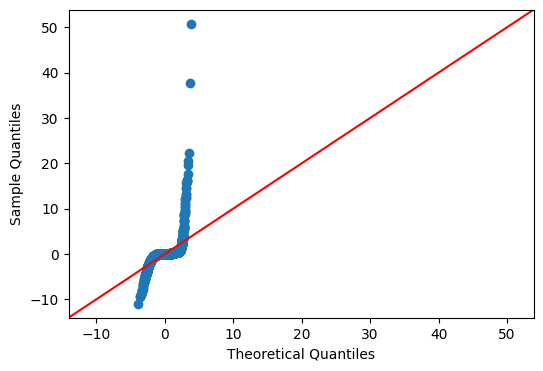

In [52]:

## Create a Q-QPlot

# first calculate residuals 
resid = y_test - y_hat_test

## then use sm's qqplot
fig, ax = plt.subplots(figsize=(6,4))
sm.graphics.qqplot(resid,line='45',fit=True,ax=ax);

### Residual Plot for Checking Homoscedasticity

[Text(0, 0.5, 'Residuals'), Text(0.5, 0, 'Predicted Revenue')]

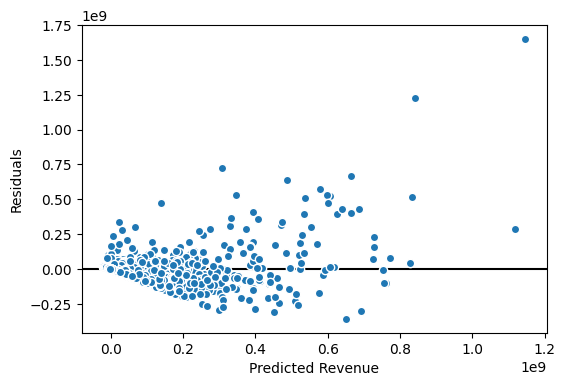

In [53]:
## Plot scatterplot with y_hat_test vs resids
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(y_hat_test, resid, ec='white')
ax.axhline(0,c='black',zorder=0)
ax.set(ylabel='Residuals',xlabel='Predicted Revenue')

### Putting it all together

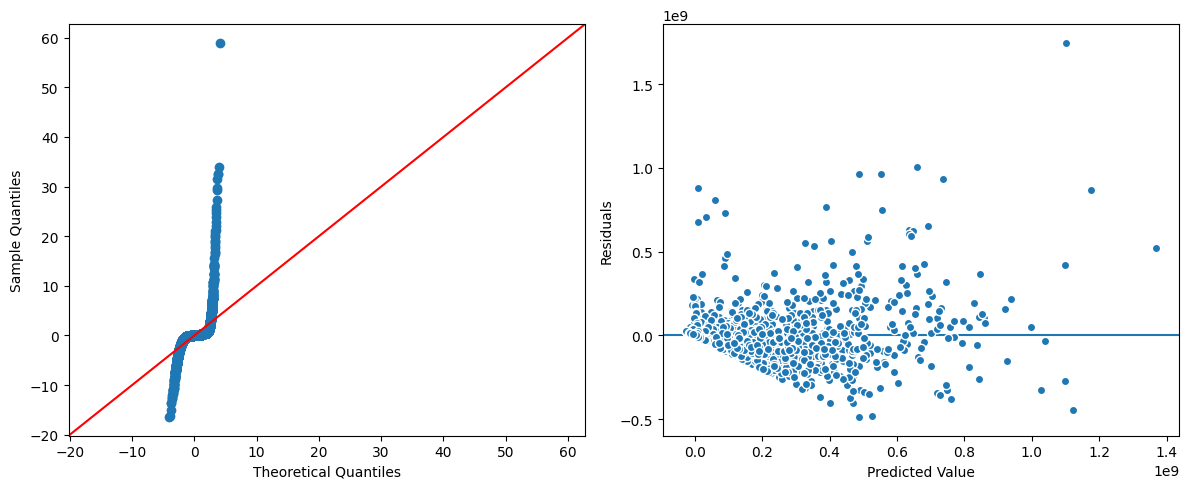

In [54]:
def evaluate_ols(result,X_train_df, y_train):
    """Plots a Q-Q Plot and residual plot for a statsmodels OLS regression.
    """
    
    ## save residuals from result
    y_pred = result.predict(X_train_df)
    resid = y_train - y_pred
    
    fig, axes = plt.subplots(ncols=2,figsize=(12,5))
    
    ## Normality 
    sm.graphics.qqplot(resid,line='45',fit=True,ax=axes[0]);
    
    ## Homoscedasticity
    ax = axes[1]
    ax.scatter(y_pred, resid, edgecolor='white',lw=1)
    ax.axhline(0,zorder=0)
    ax.set(ylabel='Residuals',xlabel='Predicted Value');
    plt.tight_layout()
    
evaluate_ols(result,X_train_df, y_train)



> Next class: iterating on our model & interpreting coefficients